## Exercises

1. What type of algorithm would you use to segment a company customers database into multiple groups?
I would use a clustering agorithm, such as K-means. This kind of algorithm would group similar observations in the same group or cluster.

2. Would you frame the problem of spam detection as a supervised learning problem or an unsupervised learning problem? Explain.
I would frame spam deterction as supervised learning because there is a clear goal: spam or not spam. Unsupervised learning has no target variable to be modeled and is used to observe new patterns in datasets.

3. What is a test set, and why would you want to use it?
A test set is the portion of the dataset that you will use to test how well/effective your model is after it's trained on the training dataset.

4. You are training a classification model with 100 variables/features that achieves 95% accuracy in the training dataset. However, when you run it in the test dataset, you only get 60% accuracy. Which of the following options are valid approached to solve this problem?
E (a and c).

In [1]:
import boto3
import pandas as pd; pd.set_option('display.max_column', 100)
import numpy as np


## define bucket in which you are trying to reach
s3 = boto3.resource('s3')
bucket_name = 'daltondencklau-data445-bucket'
bucket = s3.Bucket(bucket_name)


## define csv file to read in the bucket
file_key= 'Real_Estate.csv'

## syntax to allow us to read the file
bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

## reading the data file
house_price = pd.read_csv(file_content_stream)
house_price.head()

,No,transaction_date,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


## Dropping the 'No' and 'transaction_date' column

In [2]:
house_price = house_price.drop(columns = ['No', 'transaction_date'], axis =1)
house_price.head()

,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


## Builiding Linear Regression Model 1

In [3]:
from sklearn.model_selection import train_test_split

## defining input and target variables
X = house_price.drop(columns = 'house_price_of_unit_area', axis =1)
Y = house_price['house_price_of_unit_area']

## splitting the data into 80% training and 20% testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .2)

In [4]:
## building the linear regression model
from sklearn.linear_model import LinearRegression
lm_md = LinearRegression().fit(X_train, Y_train)

In [5]:
## predicting on the testing dataset
lm_preds = lm_md.predict(X_test)
lm_preds

array([46.61308767, 46.37510245, 34.67950202, 41.23247787, 55.37207794,
       41.76763118, 33.49617094, 28.07965999, 40.03387212, 45.8472948 ,
       46.06330878, 46.1007306 , 28.17145807, 13.54770063, 47.86664828,
       23.78101952, 50.76665714, 42.60903456, 10.90748907, 10.71581969,
       29.54598031, 46.9471282 , 43.4915215 , 14.56144384, 39.57189369,
       48.08246262, 33.69084729, 14.20145358, 30.40132614, 30.33796719,
       26.09043138, 38.838156  , 43.43158263, 52.95346207, 10.53248328,
       37.47702117, 38.17688473, 49.52206507, 41.19487058, 49.01702601,
       49.55115102, 39.60703602, 38.85917051, 42.48023512, 14.01137673,
       53.52213192, 42.54168553, 14.296492  , 12.8095008 , 45.50471771,
       46.79867721,  0.63721718, 38.71121234, 43.80671273, 29.19406624,
       36.76889861, 44.94392247, 34.22127446, 54.25829549, 34.12305218,
       14.59312332, 46.73531826, 33.17333567, 39.97542819, 47.77079434,
       42.58546188, 46.9471282 , 38.31243338, 31.9019079 , 33.95

In [6]:
## calculating the MSE for model 1
np.mean((Y_test - lm_preds)**2)

69.79273085050119

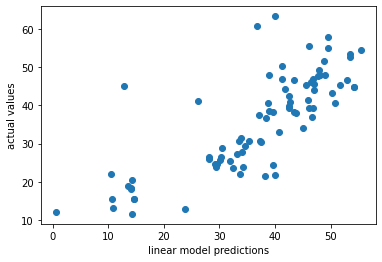

In [7]:
## visualizing results
import matplotlib.pyplot as plt
plt.scatter(lm_preds, Y_test)
plt.xlabel('linear model predictions')
plt.ylabel('actual values')
plt.show()

In [8]:
## The MSE for model 1 is 44.59

## Building Linear Regression Model 2

In [9]:
## defining input and target variables
X2 = house_price[['house_age', 'distance_to_the_nearest_MRT_station', 'number_of_convenience_stores', 'latitude', 'longitude']]
Y2 = house_price['house_price_of_unit_area']

In [10]:
## building the linear regression model
lm_md_2 = LinearRegression().fit(X_train.drop(columns = ['distance_to_the_nearest_MRT_station'], axis = 1), Y_train)

In [11]:
## predicting on the testing dataset
lm_preds_2 = lm_md_2.predict(X_test.drop(columns = ['distance_to_the_nearest_MRT_station'], axis = 1))
lm_preds_2

array([43.44521349, 46.83856251, 34.26922557, 40.34893415, 57.4678613 ,
       42.13176601, 31.20666261, 25.83299429, 38.32107071, 45.11922098,
       43.25942731, 45.37358663, 29.86053202, 16.09362702, 49.30987952,
       19.29438254, 50.8081081 , 42.98871534, 14.93810174, 14.13432114,
       30.90130757, 43.39832633, 45.34953044, 17.11108961, 41.34205694,
       49.41171032, 32.15400251, 16.74959594, 31.75979163, 31.69620022,
       33.00589205, 39.0810956 , 44.91738955, 54.16969384, 14.12813334,
       36.58582247, 36.245968  , 46.2067011 , 35.14216991, 50.0431762 ,
       50.44164308, 35.51767781, 39.12334981, 42.59668198, 16.5588217 ,
       53.96361108, 40.64972407, 16.84498306, 14.78964491, 40.27402269,
       47.2111164 ,  9.26862756, 34.17272251, 37.50771958, 33.34173324,
       34.43131322, 48.11660047, 34.11860348, 55.72412257, 33.45124609,
       17.14288532, 47.14752499, 33.16071195, 40.22054083, 49.79263135,
       42.67143096, 43.39832633, 36.73869939, 32.47670068, 32.95

In [12]:
## calculating the MSE for model 2
np.mean((Y_test -lm_preds_2)**2)

66.41588291374126

In [13]:
## The MSE for model 2 is 263.37

In [14]:
## Based on the MSE from both of these models, I would select the first model because the MSE value is lower.

## Reating above steps 100 times

In [15]:
## creating a data frame to store results
import numpy as np
MSE_results = pd.DataFrame({'MSE_results': np.repeat(np.nan, 100), ' md1_results': np.repeat(np.nan, 100), 'md2_results': np.repeat(np.nan, 100)})
MSE_results

,MSE_results,md1_results,md2_results
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
95,NaN,NaN,NaN
96,NaN,NaN,NaN
97,NaN,NaN,NaN
98,NaN,NaN,NaN


In [16]:
MSE_results = pd.DataFrame({'md1_results': np.repeat(np.nan, 100), 'md2_results': np.repeat(np.nan, 100)})
print(MSE_results)

## defining input and target variables for model 1
X = house_price.drop(columns = 'house_price_of_unit_area', axis =1)
Y = house_price['house_price_of_unit_area']

## defining input and target variables for model 2
X2 = house_price.drop(columns = ['distance_to_the_nearest_MRT_station'], axis = 1)
Y2 = house_price['house_price_of_unit_area']

for i in range(0,100):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .2)
    md1 = LinearRegression().fit(X_train, Y_train)
    
    md2 = LinearRegression().fit(X_train.drop(columns = ['distance_to_the_nearest_MRT_station'], axis = 1), Y_train)
    
    ## predicting on the test dataset
    md1_preds = md1.predict(X_test)
    md2_preds = md2.predict(X_test.drop(columns = ['distance_to_the_nearest_MRT_station'], axis = 1))
    
    ## computing MSE
    mse1 = np.mean((Y_test - md1_preds)**2)
    mse2 = np.mean((Y_test - md2_preds)**2)
    MSE_results['md1_results'][i] = mse1
    MSE_results['md2_results'][i] = mse2
    
print('The mse of model 1 is: ', MSE_results['md1_results'].mean())
print('The mse of model 1 is: ', MSE_results['md2_results'].mean())
print(MSE_results)
print('md1_results')

    md1_results  md2_results
0           NaN          NaN
1           NaN          NaN
2           NaN          NaN
3           NaN          NaN
4           NaN          NaN
..          ...          ...
95          NaN          NaN
96          NaN          NaN
97          NaN          NaN
98          NaN          NaN
99          NaN          NaN

[100 rows x 2 columns]
The mse of model 1 is:  81.20257498932355
The mse of model 1 is:  87.26655659868739
    md1_results  md2_results
0    118.140023   129.677118
1     63.002228    62.862394
2     90.769825    97.990949
3     67.571006    71.992181
4     64.350709    63.278024
..          ...          ...
95    48.224140    58.340030
96    63.732136    63.676182
97    69.417040    83.399152
98    97.024605   102.438050
99    58.811817    69.895628

[100 rows x 2 columns]
md1_results


### Visualizing results on a graph

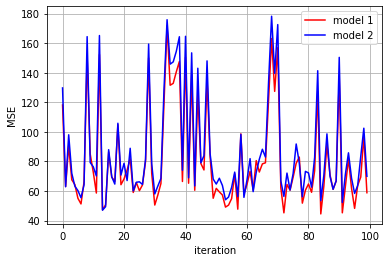

In [32]:
##for i in range(1, 101):
plt.plot(MSE_results['md1_results'], color = 'red')
plt.plot(MSE_results['md2_results'], color = 'blue')
plt.xlabel('iteration')
plt.ylabel('MSE')
plt.legend(loc = 'upper right', labels = ['model 1', 'model 2'])
plt.grid()
plt.show();

In [33]:
## df['col']